# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [5]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

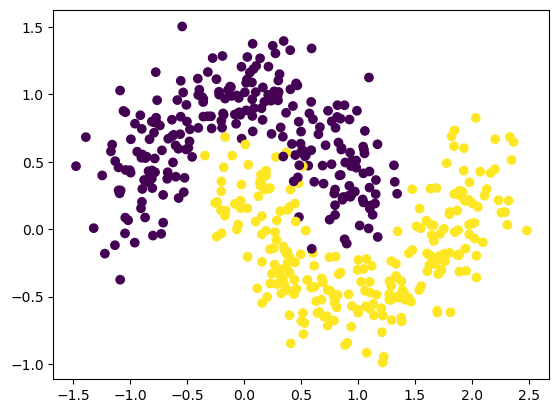

In [6]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

Logistic Regression accuracy: 0.856


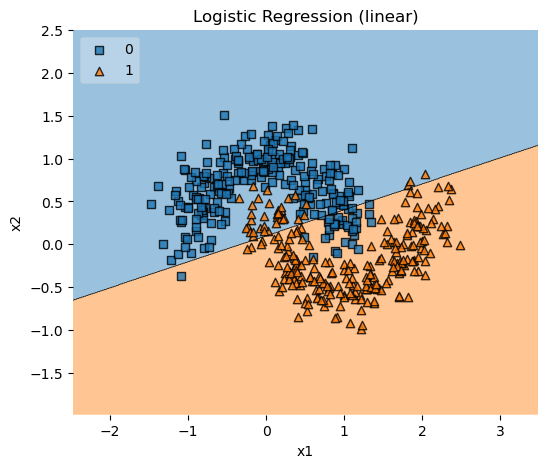

Linear SVM accuracy: 0.858


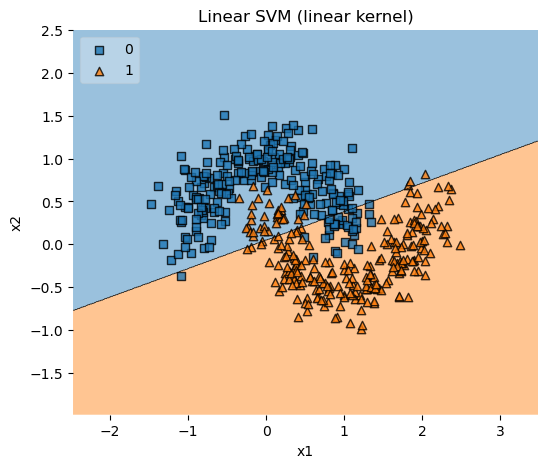

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
svm = SVC(kernel='linear', C=1.0, random_state=42)

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

def plot_decisions(X, y, clf, title):
    plt.figure(figsize=(6, 5))
    plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

y_pred_lr = lr.predict(moons_points)
acc_lr = accuracy_score(moons_labels, y_pred_lr)
print(f"Logistic Regression accuracy: {acc_lr:.3f}")
plot_decisions(moons_points, moons_labels, lr, "Logistic Regression (linear)")

y_pred_svm = svm.predict(moons_points)
acc_svm = accuracy_score(moons_labels, y_pred_svm)
print(f"Linear SVM accuracy: {acc_svm:.3f}")
plot_decisions(moons_points, moons_labels, svm, "Linear SVM (linear kernel)")


### Results: Logistic Regression vs Linear SVM

Both Logistic Regression and linear SVM learn almost identical **linear** decision boundaries and achieve similar performance (≈0.86 accuracy). This confirms that, for this non-linearly separable moons dataset, linear models can only roughly cut the two clusters apart, so their quality is limited and cannot fully exploit the curved class structure.


## 1.2 Kernel trick

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Best for kernel='poly': acc=0.906, params={'degree': 3, 'C': 1.0, 'gamma': 'scale', 'coef0': 0.0}
Best for kernel='rbf': acc=0.986, params={'C': 10.0, 'gamma': 5.0}
Best for kernel='sigmoid': acc=0.846, params={'C': 1.0, 'gamma': 0.1, 'coef0': 0.0}


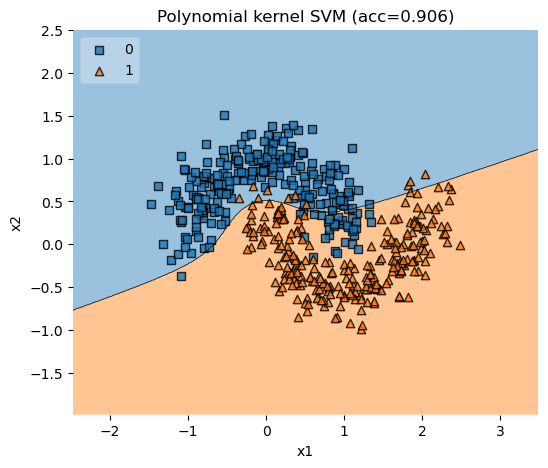

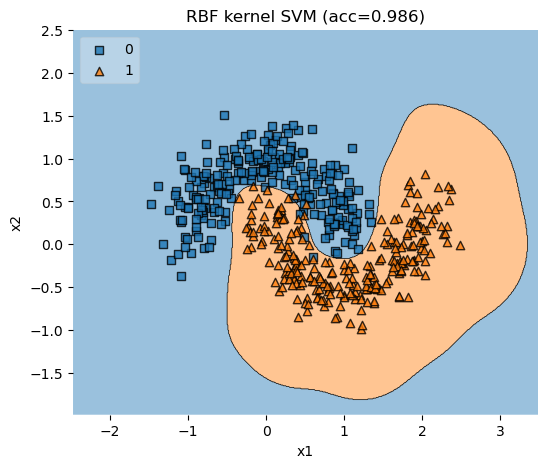

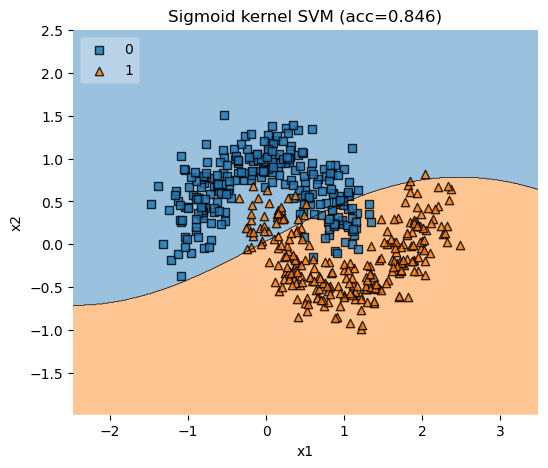

In [ ]:
def search_svc(kernel, param_list):
    best_acc = 0.0
    best_params = None
    for params in param_list:
        clf = SVC(kernel=kernel, random_state=42, **params)
        clf.fit(moons_points, moons_labels)
        acc = accuracy_score(moons_labels, clf.predict(moons_points))
        if acc > best_acc:
            best_acc = acc
            best_params = params
    print(f"Best for kernel='{kernel}': acc={best_acc:.3f}, params={best_params}")
    best_clf = SVC(kernel=kernel, random_state=42, **best_params)
    best_clf.fit(moons_points, moons_labels)
    return best_clf, best_acc, best_params

poly_params = [
    {"degree": d, "C": C, "gamma": "scale", "coef0": 0.0}
    for d in [2, 3, 4, 5]
    for C in [0.1, 1.0, 10.0]
]

rbf_params = [
    {"C": C, "gamma": g}
    for C in [0.1, 1.0, 10.0]
    for g in [0.1, 1.0, 5.0]
]

sigmoid_params = [
    {"C": C, "gamma": g, "coef0": c0}
    for C in [0.1, 1.0, 10.0]
    for g in [0.1, 1.0]
    for c0 in [0.0, 1.0]
]

poly_clf, poly_acc, poly_best = search_svc("poly", poly_params)
rbf_clf,  rbf_acc,  rbf_best  = search_svc("rbf",  rbf_params)
sig_clf,  sig_acc,  sig_best  = search_svc("sigmoid", sigmoid_params)

plot_decisions(moons_points, moons_labels, poly_clf,
               f"Polynomial kernel SVM (acc={poly_acc:.3f})")
plot_decisions(moons_points, moons_labels, rbf_clf,
               f"RBF kernel SVM (acc={rbf_acc:.3f})")
plot_decisions(moons_points, moons_labels, sig_clf,
               f"Sigmoid kernel SVM (acc={sig_acc:.3f})")


### Kernel SVM: results and comparison

**Classification quality.**  
Using nonlinear kernels dramatically improves performance compared to linear models.

- Polynomial kernel (degree = 3): **accuracy = 0.906**
- RBF kernel: **accuracy = 0.986** — the best result overall
- Sigmoid kernel: **accuracy = 0.846** — worse than polynomial and close to linear models

Thus, the RBF kernel almost perfectly separates the two moon-shaped clusters, while polynomial performs moderately well and sigmoid remains unstable.

---

**How the decision boundaries changed.**

- **Polynomial (degree = 3)**  
  The boundary becomes curved and starts to follow the moon structure, but still remains relatively stiff.  
  It captures some nonlinearity, yet does not fully wrap around the clusters.

- **RBF (Gaussian)**  
  The boundary becomes smooth, flexible, and naturally shaped.  
  It tightly follows the geometry of the two moons and produces an almost perfect separation.

- **Sigmoid**  
  Produces a shallow, S-shaped boundary that behaves similarly to a slightly curved linear model.  
  It does not adapt well to the nonlinear shape of the data, resulting in weaker performance.

---

**Choice of polynomial degree.**  
The best parameters were:

- degree = 3  
- C = 1.0

- Degree 2 was too simple and underfit the nonlinear structure.
- Higher degrees (4, 5) increased model complexity but did **not** improve accuracy, and the boundary started to look overly wiggly.

Therefore, **degree = 3** provides the best balance between flexibility and smoothness.

---

**Overall conclusion:**  
Nonlinear kernels fundamentally change the geometry of the feature space.  
The RBF kernel is the only one that fully captures the curved “two moons” topology, producing nearly perfect classification on this dataset.



## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Logistic Regression with PolynomialFeatures(degree=3) accuracy: 0.968


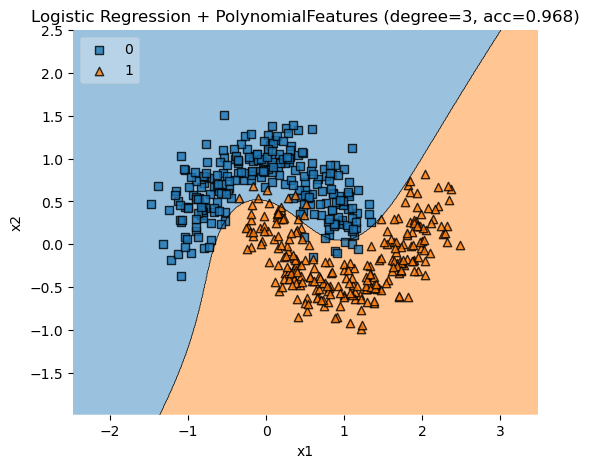

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_degree = 3

lr_poly = Pipeline([
    ("poly", PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ("lr", LogisticRegression(C=1.0, max_iter=5000, random_state=42))
])

lr_poly.fit(moons_points, moons_labels)

y_pred_poly = lr_poly.predict(moons_points)
acc_poly = accuracy_score(moons_labels, y_pred_poly)
print(f"Logistic Regression with PolynomialFeatures(degree={poly_degree}) accuracy: {acc_poly:.3f}")

plot_decisions(
    moons_points,
    moons_labels,
    lr_poly,
    f"Logistic Regression + PolynomialFeatures (degree={poly_degree}, acc={acc_poly:.3f})"
)


#### Logistic Regression + PolynomialFeatures vs polynomial-kernel SVM

Both approaches rely on the same underlying idea: map the original 2D inputs
into a higher-dimensional polynomial feature space and then apply a linear
classifier in that space.

- **Logistic Regression + PolynomialFeatures (explicit mapping)**  
  - We explicitly construct all polynomial terms up to a given degree
    (e.g. `x1^2`, `x1 x2`, `x2^3`, …).  
  - Logistic Regression then learns a linear decision boundary in this expanded
    feature space using the **logistic loss** (cross-entropy) and L2
    regularization.  
  - The model is probabilistic: it directly outputs calibrated class
    probabilities (up to regularization and data size).

- **Polynomial-kernel SVM (implicit mapping)**  
  - The polynomial kernel computes inner products in a (possibly very large)
    polynomial feature space **implicitly**, via  
    \[
    K(x, x') = (\gamma \langle x, x' \rangle + \text{coef0})^{d}.
    \]  
    We never need to construct the polynomial features explicitly.  
  - SVM optimizes the **hinge loss** and maximizes the margin between classes,
    usually with strong L2 regularization on the weights.  
  - The decision function is expressed in terms of support vectors and kernel
    evaluations; probabilities are not primary, but margins are.

**Key differences:**

- LR + PolynomialFeatures explicitly controls the feature space (degree,
  interaction terms) and uses logistic loss; poly SVM uses an implicit mapping
  and hinge loss with a margin-based objective.
- For moderate degrees (e.g. 2–3) both can produce very similar decision
  boundaries; differences mainly come from the loss function and regularization
  scheme.
- For high degrees, polynomial SVM can implicitly operate in a very large
  feature space without explicitly creating all features, whereas LR with
  PolynomialFeatures may become computationally expensive and prone to
  overfitting due to the huge number of explicit features.

In our experiments, both approaches with degree 3 produce qualitatively similar
curved boundaries; the RBF-kernel SVM still outperforms them due to its more
flexible, locally adaptive kernel.


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

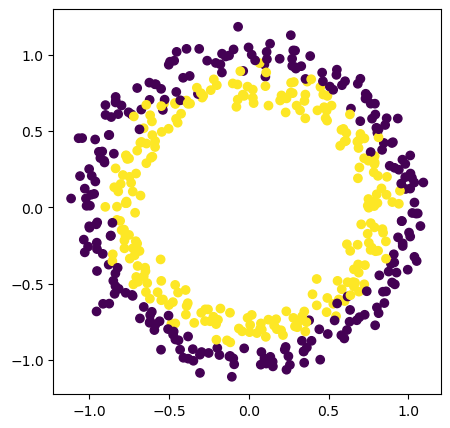

In [11]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

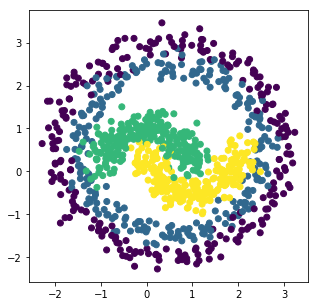

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

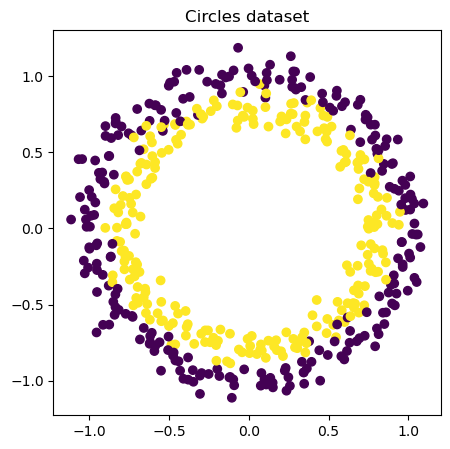

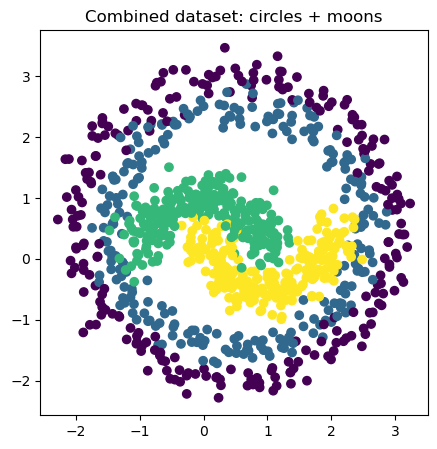

LR + PolynomialFeatures(degree=2): accuracy = 0.879
LR + PolynomialFeatures(degree=3): accuracy = 0.923
LR + PolynomialFeatures(degree=4): accuracy = 0.941
LR + PolynomialFeatures(degree=5): accuracy = 0.940

Best LR+Poly degree = 4 with accuracy = 0.941



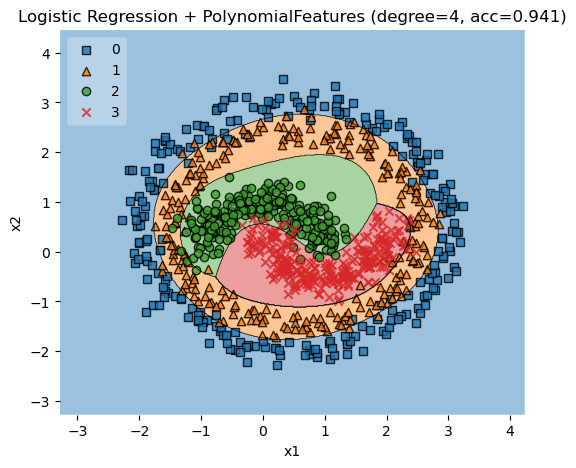

SVM RBF: C=1.0, gamma=0.1 -> accuracy = 0.884
SVM RBF: C=1.0, gamma=0.5 -> accuracy = 0.934
SVM RBF: C=1.0, gamma=1.0 -> accuracy = 0.935
SVM RBF: C=1.0, gamma=2.0 -> accuracy = 0.940
SVM RBF: C=5.0, gamma=0.1 -> accuracy = 0.899
SVM RBF: C=5.0, gamma=0.5 -> accuracy = 0.939
SVM RBF: C=5.0, gamma=1.0 -> accuracy = 0.941
SVM RBF: C=5.0, gamma=2.0 -> accuracy = 0.946
SVM RBF: C=10.0, gamma=0.1 -> accuracy = 0.908
SVM RBF: C=10.0, gamma=0.5 -> accuracy = 0.940
SVM RBF: C=10.0, gamma=1.0 -> accuracy = 0.944
SVM RBF: C=10.0, gamma=2.0 -> accuracy = 0.950
SVM RBF: C=20.0, gamma=0.1 -> accuracy = 0.923
SVM RBF: C=20.0, gamma=0.5 -> accuracy = 0.941
SVM RBF: C=20.0, gamma=1.0 -> accuracy = 0.948
SVM RBF: C=20.0, gamma=2.0 -> accuracy = 0.952

Best RBF SVM: C=20.0, gamma=2.0, accuracy = 0.952



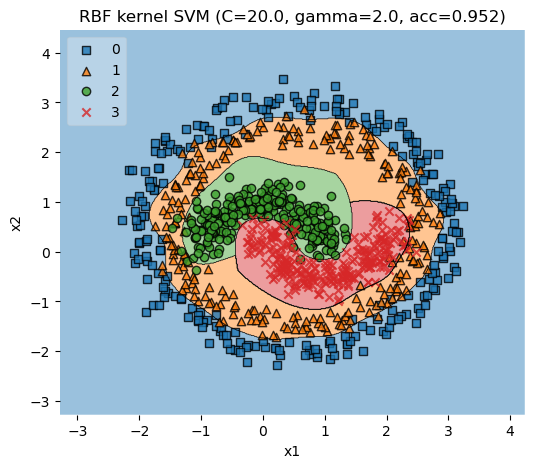

In [ ]:
def search_lr_poly(points, labels, degrees, C=1.0):
    best_deg = None
    best_acc = 0.0
    best_clf = None
    history = []

    for d in degrees:
        clf = Pipeline([
            ("poly", PolynomialFeatures(degree=d, include_bias=False)),
            ("lr", LogisticRegression(
                C=C,
                max_iter=5000,
                multi_class="auto",
                solver="lbfgs",
                random_state=42
            )),
        ])
        clf.fit(points, labels)
        y_pred = clf.predict(points)
        acc = accuracy_score(labels, y_pred)
        history.append((d, acc))
        print(f"LR + PolynomialFeatures(degree={d}): accuracy = {acc:.3f}")
        if acc > best_acc:
            best_acc = acc
            best_deg = d
            best_clf = clf

    print(f"\nBest LR+Poly degree = {best_deg} with accuracy = {best_acc:.3f}\n")
    return best_clf, best_deg, best_acc, history


def search_rbf_svm(points, labels, C_grid, gamma_grid):
    best_acc = 0.0
    best_params = None
    best_clf = None
    history = []

    for C in C_grid:
        for g in gamma_grid:
            clf = SVC(
                kernel="rbf",
                C=C,
                gamma=g,
                decision_function_shape="ovo",
                random_state=42
            )
            clf.fit(points, labels)
            y_pred = clf.predict(points)
            acc = accuracy_score(labels, y_pred)
            history.append((C, g, acc))
            print(f"SVM RBF: C={C}, gamma={g} -> accuracy = {acc:.3f}")
            if acc > best_acc:
                best_acc = acc
                best_params = (C, g)
                best_clf = clf

    print(f"\nBest RBF SVM: C={best_params[0]}, gamma={best_params[1]}, "
          f"accuracy = {best_acc:.3f}\n")
    return best_clf, best_params, best_acc, history

circles_points, circles_labels = make_circles(
    n_samples=500,
    noise=0.06,
    random_state=42
)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)
plt.title("Circles dataset")
plt.show()

points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)
plt.title("Combined dataset: circles + moons")
plt.show()

degrees = [2, 3, 4, 5]
best_lr_clf, best_deg, best_acc_lr, lr_history = search_lr_poly(points, labels, degrees)

plot_decisions(
    points,
    labels,
    best_lr_clf,
    f"Logistic Regression + PolynomialFeatures (degree={best_deg}, acc={best_acc_lr:.3f})"
)

C_grid = [1.0, 5.0, 10.0, 20.0]
gamma_grid = [0.1, 0.5, 1.0, 2.0]

best_svm, best_params_svm, best_svm_acc, svm_history = search_rbf_svm(
    points, labels, C_grid, gamma_grid
)

plot_decisions(
    points,
    labels,
    best_svm,
    f"RBF kernel SVM (C={best_params_svm[0]}, gamma={best_params_svm[1]}, acc={best_svm_acc:.3f})"
)


### Harder problem: circles + moons

In this setting the data consists of two concentric circles and a two-moon
structure inside, forming a 4-class, highly nonlinear classification problem.

#### Logistic Regression + PolynomialFeatures

I used PolynomialFeatures with degrees `{2, 3, 4, 5}` and trained a multinomial
Logistic Regression on the expanded feature space. The best result was obtained
with

- `degree = 4`
- **accuracy = 0.941**

The decision regions clearly show nested elliptical shapes that separate the
outer and inner circles, and a curved boundary that splits the two moon
classes. However, the global shape is still constrained by a degree-4
polynomial: boundaries look slightly “oval” and somewhat rigid, especially in
the outer area.

#### RBF kernel SVM

For RBF SVM I performed a small grid search over `C ∈ {1, 5, 10, 20}` and
`gamma ∈ {0.1, 0.5, 1.0, 2.0}`. The best model achieved

- `C = 20.0`, `gamma = 2.0`
- **accuracy = 0.952**

The corresponding decision regions are smoother and adapt more naturally to the
geometry of all four classes: the circular shells and the moon-shaped clusters
are wrapped more tightly, with fewer artifacts at the boundaries.

#### Comparison and conclusions

- Polynomial feature generation allows Logistic Regression to handle this
  complex 4-class problem surprisingly well: with degree 4 it already reaches
  **94%** accuracy and produces meaningful nonlinear boundaries.
- The RBF SVM still performs slightly better (about **95%** accuracy) and
  yields cleaner decision regions. The Gaussian kernel can model local
  variations more flexibly than a global degree-4 polynomial.
- Overall, this experiment highlights the trade-off between explicit feature
  engineering (PolynomialFeatures + LR) and kernel methods (RBF SVM): both can
  solve nonlinear problems, but kernels usually provide more flexible and
  robust decision boundaries on heterogeneous datasets like this one.


## Final Conclusions: SVM, kernels and feature generation

In this lab I explored how different linear and nonlinear models behave on
synthetic datasets with clearly nonlinearly separable structure.

**1. Linear models are not enough.**  
On the basic two-moons dataset both Logistic Regression and linear SVM produce
almost identical straight decision boundaries with accuracy around 0.86.  
They cannot capture the curved geometry of the classes.

**2. Kernels dramatically change the game.**  
Switching to nonlinear SVM kernels leads to a large improvement:
- Polynomial kernel (degree 3) already follows the moon shape and reaches
  ~0.91 accuracy.
- RBF kernel almost perfectly separates the classes with accuracy ≈ 0.99.
- Sigmoid kernel performs worse and behaves similarly to a slightly curved
  linear model.

This illustrates that the choice of kernel strongly influences both the
flexibility and quality of SVM.

**3. Feature generation can make linear models powerful.**  
Using `PolynomialFeatures` with degree 3, Logistic Regression on the moons
dataset achieves ≈ 0.97 accuracy and produces a highly nonlinear boundary.  
On the harder combined dataset (circles + moons, 4 classes), degree 4 polynomials
allow Logistic Regression to reach ≈ 0.94 accuracy and separate the inner/outer
circles and the moon clusters reasonably well.

Linear models become competitive once the feature space is rich enough.

**4. Explicit vs implicit mappings.**  
Polynomial feature expansion and polynomial-kernel SVM operate in similar
feature spaces, but:
- LR + PolynomialFeatures explicitly constructs all polynomial terms and optimizes
  logistic loss,
- poly-kernel SVM uses an implicit mapping via the kernel and optimizes hinge
  loss with a margin-based objective.

For moderate degrees they produce similar boundaries; for higher degrees SVM
can handle very large implicit feature spaces more efficiently than explicit
PolynomialFeatures.

**5. RBF SVM remains the most flexible.**  
On the hardest dataset, RBF SVM with tuned `C` and `gamma` reaches ≈ 0.95
accuracy and produces the cleanest, smoothest decision regions. The Gaussian
kernel adapts locally to the data and models both circular and moon-shaped
structures simultaneously.

**Overall takeaway.**  
- Linear models are simple and fast but limited on complex geometries.  
- Carefully designed feature transformations (PolynomialFeatures) can make them
  surprisingly strong.  
- Kernel methods, especially RBF SVM, provide a principled way to obtain highly
  flexible decision boundaries without explicit feature engineering, at the cost
  of more expensive training and tuning.

This lab clearly demonstrates how kernels and feature generation interact and
why they are fundamental tools in modern machine learning.
